<a href="https://colab.research.google.com/github/lunu5/diveintocode-ml/blob/master/Predicting_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[Problem 1] Feature selection for practice

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
%matplotlib inline
data = pd.read_csv('https://raw.githubusercontent.com/lunu5/diveintocode-ml/master/train.csv')
y = np.array(data['SalePrice'])
x = np.array(data[['GrLivArea', 'YearBuilt']])

#[Problem 2] Estimation and evaluation by linear regression

##Analysis

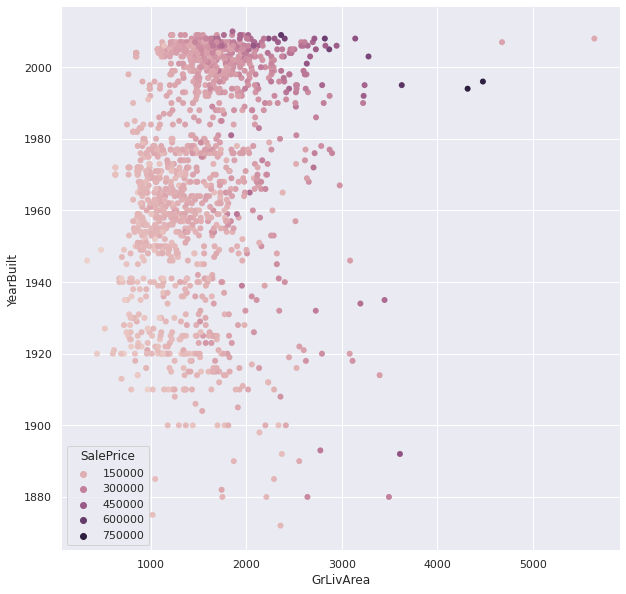

In [2]:
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="GrLivArea", y="YearBuilt", hue="SalePrice", hue_order=clarity_ranking, linewidth=0, data=data)
plt.show() 

It can be seen that the sale price is higher as the house built more recent and the ground living area wider.

##Pre-processing

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

##Training and estimation

In [4]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(x_train, y_train)
clf_GrLivArea = LinearRegression().fit(x_train[:, 0].reshape(-1, 1), y_train)
clf_YearBuilt = LinearRegression().fit(x_train[:, 1].reshape(-1, 1), y_train)
reg = clf.predict(x_test)
reg_GrLivArea = clf_GrLivArea.predict(x_test[:, 0].reshape(-1, 1))
reg_YearBuilt = clf_YearBuilt.predict(x_test[:, 1].reshape(-1, 1))

##Evaluation

In [5]:
from sklearn.metrics import mean_squared_error
mreg = mean_squared_error(y_test, reg)
mreg

1519594927.283437

##Visualization
For linear regression method, the predicted result stay within a line only if it is predicted base on 1 feature. Furthermore, for this problem, there are 2 features so the result estimated base on both variable will be in a plane, not a line. Therefore, there will be 3 types of estimation as follow.

###Base on GrGrLivArea

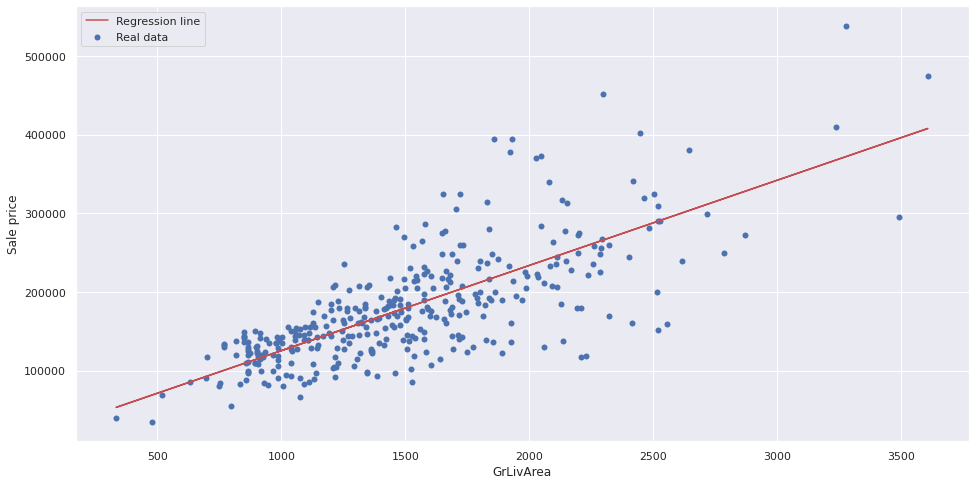

In [6]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=x_test[:, 0], y=y_test, linewidth=0, label = 'Real data')
plt.plot(x_test[:, 0], reg_GrLivArea, label = 'Regression line', c='r')
plt.xlabel('GrLivArea')
plt.ylabel('Sale price')
plt.legend()
plt.show()

###Base on YearBuilt

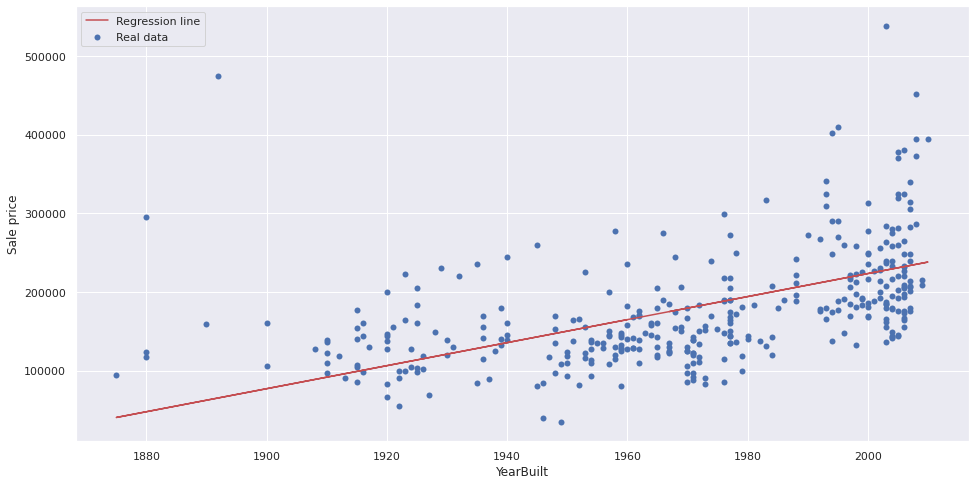

In [7]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=x_test[:, 1], y=y_test, linewidth=0, label = 'Real data')
plt.plot(x_test[:, 1], reg_YearBuilt, label = 'Regression line', c='r')
plt.xlabel('YearBuilt')
plt.ylabel('Sale price')
plt.legend()
plt.show()

###Base on both features

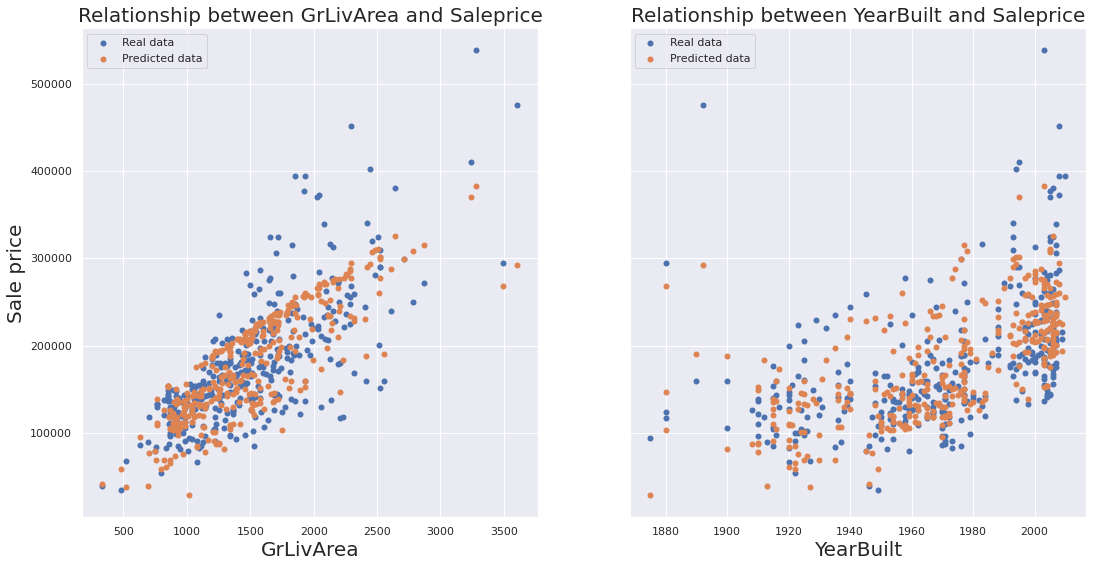

In [8]:
def plot_scatter(predict):
  fig, axs = plt.subplots(1, 2, figsize=(18, 9), sharey=True)
  axs[0].set_ylabel('Sale price', fontsize = 20)
  axs[0].set_xlabel('GrLivArea', fontsize = 20)
  axs[1].set_xlabel('YearBuilt', fontsize = 20)
  axs[0].set_title('Relationship between GrLivArea and Saleprice', fontsize = 20)
  axs[1].set_title('Relationship between YearBuilt and Saleprice', fontsize = 20)
  sns.scatterplot(x=x_test[:, 0], y=y_test, linewidth=0, ax=axs[0], label = 'Real data')
  sns.scatterplot(x=x_test[:, 0], y=predict, linewidth=0, ax=axs[0], label = 'Predicted data')
  sns.scatterplot(x=x_test[:, 1], y=y_test, linewidth=0, ax=axs[1], label = 'Real data')
  sns.scatterplot(x=x_test[:, 1], y=predict, linewidth=0, ax=axs[1], label = 'Predicted data')
  plt.show() 
plot_scatter(reg)

#[Problem 3] Comparison of methods

##Linear regression
See in problem 2

##SVM

###Learning and estimation

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC()).fit(x_train, y_train)
svm = clf.predict(x_test)

###Evaluation

In [10]:
m_svm = mean_squared_error(y_test, svm)
m_svm

2986742887.830137

###Visualization

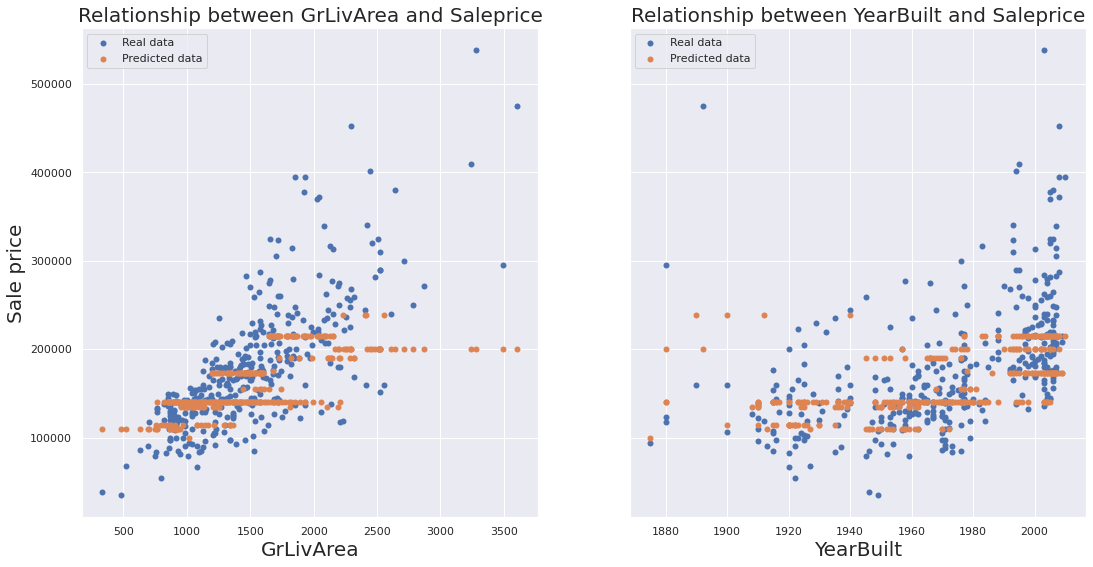

In [11]:
plot_scatter(svm)

##Decision tree

###Learning and estimation

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
cross_val_score(clf, x_train, y_train)
dtree = clf.predict(x_test)

###Evaluation

In [13]:
m_dtree = mean_squared_error(y_test, dtree)
m_dtree

2727037315.2493153

###Visualization

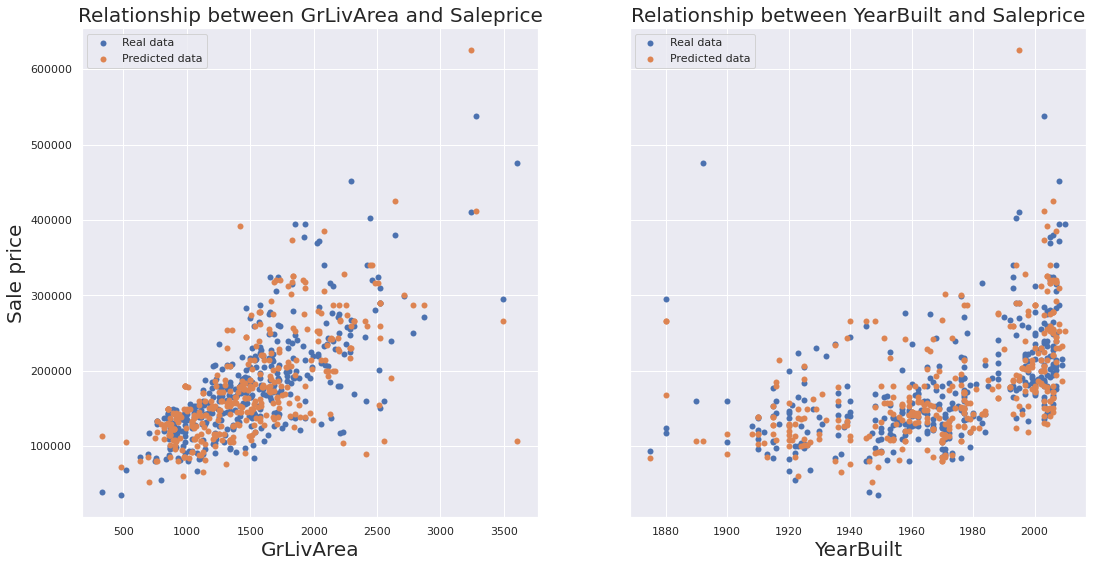

In [14]:
plot_scatter(dtree)

##Random forest

###Learning and estimation

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(x_train, y_train)
ranf = clf.predict(x_test)

###Evaluation

In [16]:
m_ranf = mean_squared_error(y_test, ranf)
m_ranf

2432151301.5726027

###Visualization

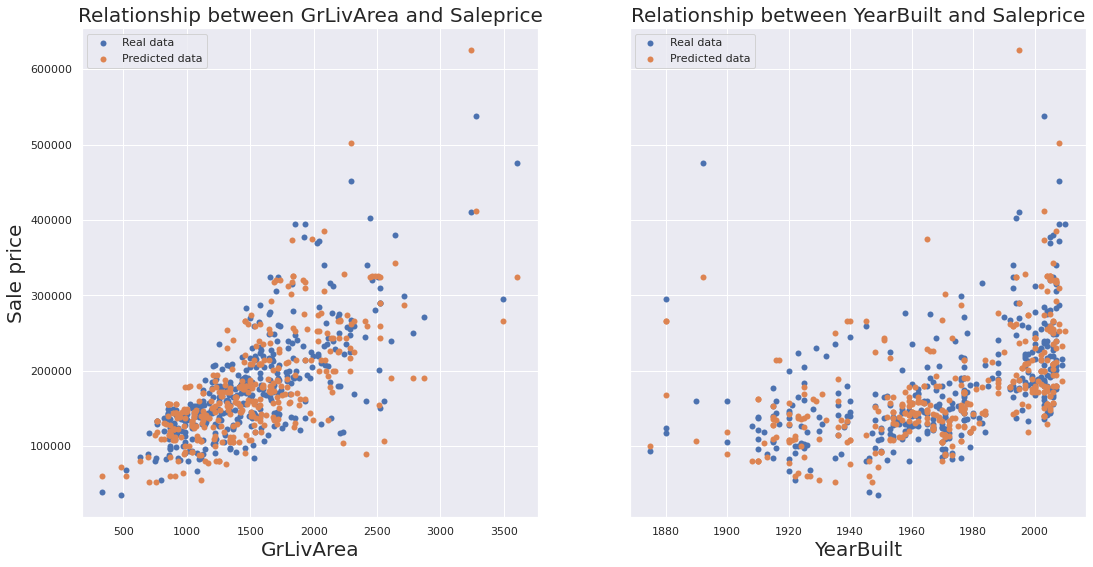

In [17]:
plot_scatter(ranf)

##Comparation

In [18]:
table = [mreg, m_svm, m_dtree, m_ranf]

In [19]:
table = pd.DataFrame(table, index = ['Linear regression', 'SMV', 'Decision tree', 'Random forest'])
table

,0
Linear regression,1.519595e+09
SMV,2.986743e+09
Decision tree,2.727037e+09
Random forest,2.432151e+09


According to the table, the linear regression method is the best one while SVM is the worst. However, all of the scores are signficantly bad because there are only 2 features to predict the target.